In [859]:
# Load file 
import numpy as np
import numpy.ma as ma
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn import linear_model

file = np.load('C:\python\proyecto_training_data.npy', mmap_mode='r')
header=np.array(['SalesPrice','OverallQual', '1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])

In [740]:
### Análisis Exploratorio De Datos

#Separar datos 80/20.  tr80=training80%; te20=testing20%
totalRows = np.count_nonzero(file[:,0])
tot80 = int(totalRows * 80/100)
tr80 = file[0:tot80,:]
te20 = file[tot80+1:tot, :]
print("Total Lines in file:", tot)
print("Training:[", 0,"-", tot80,"];\tTesting:[", tot80+1,"-", tot,"]")

# Calcular para cada variable leída
# Media
# Valor Máximo
# Valor Mínimo
# Rango (peak2peak)
# Desviación Estándar


Total Lines in file: 1460
Training:[ 0 - 1168 ];	Testing:[ 1169 - 1460 ]


Variable 0 : SalesPrice
*Media:		 180590.27739726027
*Valor Máximo:	 755000.0
*Valor Mínimo:	 34900.0
*Rango (peak2peak):	 720100.0
*Desviación Estándar:	 78781.95108033362 



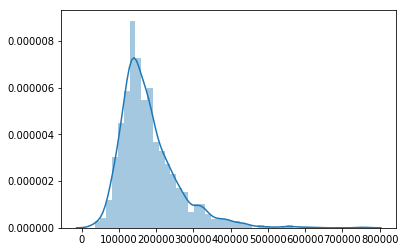

In [100]:
# Sales Price
index=0
print("Variable", index, ":", header[index])
print("*Media:\t\t", np.mean(tr80[:,index]))
price_max = np.max(tr80[:,index])
price_min = np.min(tr80[:,index])
print("*Valor Máximo:\t", price_max)
print("*Valor Mínimo:\t", price_min)
print("*Rango (peak2peak):\t", price_max-price_min)
print("*Desviación Estándar:\t", np.std(tr80[:,index]),"\n")
ax = sns.distplot(tr80[:,index])

Variable 1 : OverallQual
*Media:		 6.101027397260274
*Valor Máximo:	 10.0
*Valor Mínimo:	 1.0
*Rango (peak2peak):	 9.0
*Desviación Estándar:	 1.377435193240741 



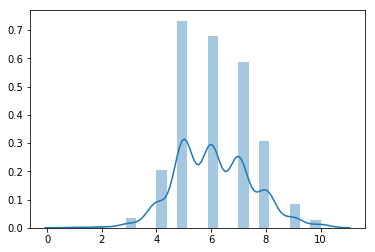

In [81]:
# Overall Quality
index = 1
print("Variable", index, ":", header[index])
print("*Media:\t\t", np.mean(tr80[:,index]))
price_max = np.max(tr80[:,index])
price_min = np.min(tr80[:,index])
print("*Valor Máximo:\t", price_max)
print("*Valor Mínimo:\t", price_min)
print("*Rango (peak2peak):\t", price_max-price_min)
print("*Desviación Estándar:\t", np.std(tr80[:,index]),"\n")
ax = sns.distplot(tr80[:,index])

Variable 2 : 1stFlrSF
*Media:		 1156.3236301369864
*Valor Máximo:	 3228.0
*Valor Mínimo:	 334.0
*Rango (peak2peak):	 2894.0
*Desviación Estándar:	 373.620331503586 



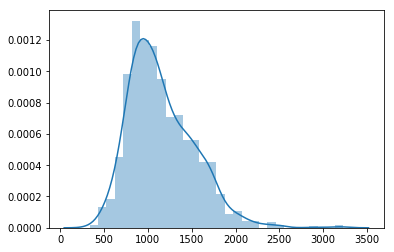

In [82]:
# 1stFlrSF
index = 2
print("Variable", index, ":", header[index])
print("*Media:\t\t", np.mean(tr80[:,index]))
price_max = np.max(tr80[:,index])
price_min = np.min(tr80[:,index])
print("*Valor Máximo:\t", price_max)
print("*Valor Mínimo:\t", price_min)
print("*Rango (peak2peak):\t", price_max-price_min)
print("*Desviación Estándar:\t", np.std(tr80[:,index]),"\n")
ax = sns.distplot(tr80[:,index])

Variable 3 : TotRmsAbvGrd
*Media:		 6.4854452054794525
*Valor Máximo:	 14.0
*Valor Mínimo:	 2.0
*Rango (peak2peak):	 12.0
*Desviación Estándar:	 1.6084517167387253 



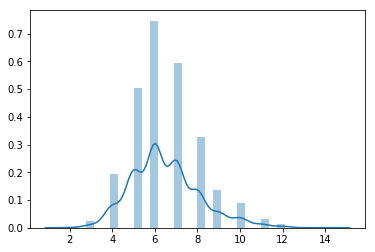

In [83]:
# TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
index = 3
print("Variable", index, ":", header[index])
print("*Media:\t\t", np.mean(tr80[:,index]))
price_max = np.max(tr80[:,index])
price_min = np.min(tr80[:,index])
print("*Valor Máximo:\t", price_max)
print("*Valor Mínimo:\t", price_min)
print("*Rango (peak2peak):\t", price_max-price_min)
print("*Desviación Estándar:\t", np.std(tr80[:,index]),"\n")
ax = sns.distplot(tr80[:,index])

Variable 4 : YearBuilt
*Media:		 1971.451198630137
*Valor Máximo:	 2010.0
*Valor Mínimo:	 1875.0
*Rango (peak2peak):	 135.0
*Desviación Estándar:	 29.93888206867768 



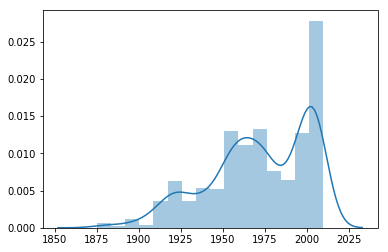

In [84]:
# YearBuilt: Original construction date
index = 4
print("Variable", index, ":", header[index])
print("*Media:\t\t", np.mean(tr80[:,index]))
price_max = np.max(tr80[:,index])
price_min = np.min(tr80[:,index])
print("*Valor Máximo:\t", price_max)
print("*Valor Mínimo:\t", price_min)
print("*Rango (peak2peak):\t", price_max-price_min)
print("*Desviación Estándar:\t", np.std(tr80[:,index]),"\n")
ax = sns.distplot(tr80[:,index])

Variable 5 : LotFrontage
*Media:		 69.94698544698545
*Valor Máximo:	 313.0
*Valor Mínimo:	 21.0
*Rango (peak2peak):	 292.0
*Desviación Estándar:	 23.4659548199304 



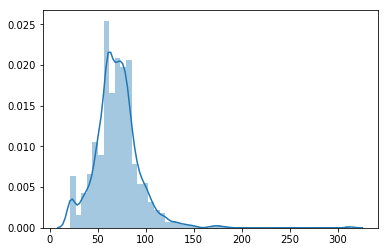

In [109]:
# LotFrontage: Linear feet of street connected to property
index = 5
print("Variable", index, ":", header[index])
print("*Media:\t\t", np.nanmean(tr80[:,index]))
price_max = np.nanmax(tr80[:,index])
price_min = np.nanmin(tr80[:,index])
print("*Valor Máximo:\t", price_max)
print("*Valor Mínimo:\t", price_min)
print("*Rango (peak2peak):\t", price_max-price_min)
print("*Desviación Estándar:\t", np.nanstd(tr80[:,index]),"\n")
x = tr80[:,index]
x = x[np.logical_not(np.isnan(x))]
ax = sns.distplot(x)

Variable 1 - OverallQual


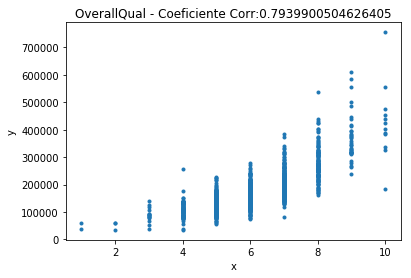

Coeficiente de correlación: 0.7939900504626405


In [141]:
# Scatter Plot y Coeficiente de Correlación
index=1
print("Variable", index,"-",header[index])

x = tr80[:, index]
y = tr80[:, 0]

coefCorr = np.corrcoef(x,y)

fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.scatter(x, y,marker='.')  
ax.set_xlabel('x')
ax.set_ylabel('y')
title = header[index] + " - Coeficiente Corr:" + str(coefCorr[0,1])
ax.set_title(title)
plt.show()

print("Coeficiente de correlación:", coefCorr[0,1])

Variable 2 - 1stFlrSF


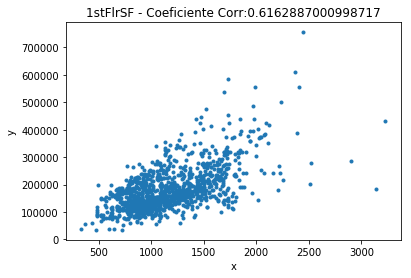

Coeficiente de correlación: 0.6162887000998717


In [142]:
index=2
print("Variable", index,"-",header[index])

x = tr80[:, index]
y = tr80[:, 0]

coefCorr = np.corrcoef(x,y)

fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.scatter(x, y,marker='.')  
ax.set_xlabel('x')
ax.set_ylabel('y')
title = header[index] + " - Coeficiente Corr:" + str(coefCorr[0,1])
ax.set_title(title)
plt.show()

print("Coeficiente de correlación:", coefCorr[0,1])

Variable 3 - TotRmsAbvGrd


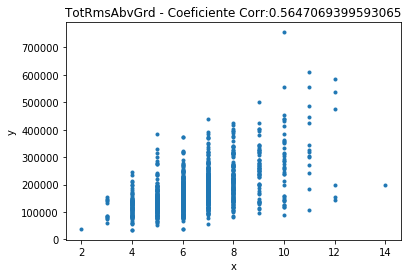

Coeficiente de correlación: 0.5647069399593065


In [145]:
index=3
print("Variable", index,"-",header[index])

x = tr80[:, index]
y = tr80[:, 0]

coefCorr = np.corrcoef(x,y)

fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.scatter(x, y,marker='.')  
ax.set_xlabel('x')
ax.set_ylabel('y')
title = header[index] + " - Coeficiente Corr:" + str(coefCorr[0,1])
ax.set_title(title)
plt.show()

print("Coeficiente de correlación:", coefCorr[0,1])

Variable 4 - YearBuilt


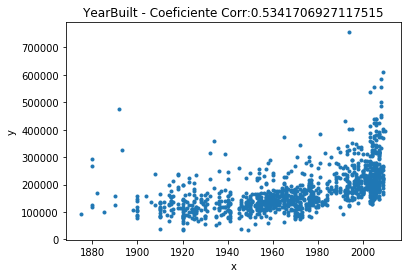

Coeficiente de correlación: 0.5341706927117515


In [146]:
index=4
print("Variable", index,"-",header[index])

x = tr80[:, index]
y = tr80[:, 0]

coefCorr = np.corrcoef(x,y)

fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.scatter(x, y,marker='.')  
ax.set_xlabel('x')
ax.set_ylabel('y')
title = header[index] + " - Coeficiente Corr:" + str(coefCorr[0,1])
ax.set_title(title)
plt.show()

print("Coeficiente de correlación:", coefCorr[0,1])

Variable 5 - LotFrontage


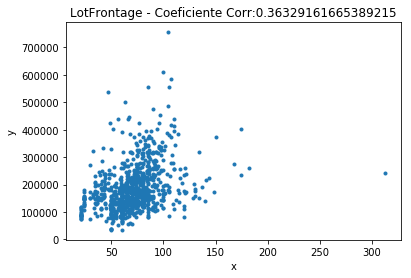

Coeficiente de correlación: [[1.0 0.36329161665389215]
 [0.36329161665389215 1.0]]


In [163]:
index=5
print("Variable", index,"-",header[index])

x = tr80[:, index]
y = tr80[:, 0]
x = ma.masked_invalid(x)
y = ma.masked_invalid(y)
msk = (~x.mask & ~y.mask)

coefCorr = ma.corrcoef(x[msk],y[msk])

fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.scatter(x[msk],y[msk],marker='.')  
ax.set_xlabel('x')
ax.set_ylabel('y')
title = header[index] + " - Coeficiente Corr:" + str(coefCorr[0,1])
ax.set_title(title)
plt.show()

print("Coeficiente de correlación:", coefCorr)

# Definición de Funciones de Entrenamiento y Gráficas

In [852]:
# Definición de Función de Entrenamiento

def entrenar(x, y, epochs, error_each, lrnRate):
    mb = np.array([1,1])
    for ep in range(0, epochs, 1):
        mat = np.ones((x.size, 2))
        mat[:,0] = x
        y_hat = np.matmul(mat, mb)
        err = 0.5 * np.mean(np.power(y-y_hat,2))
        gradientes = np.matmul((y_hat - y), mat)/y.size
        dictErr.update({ep+1:err})
        dictMB.update({ep+1:np.array([mb[0],mb[1]])})
        if (ep % error_each == 0 or ep==epochs-1):
            # Save data in dictionary
            print("Epoch:", ep+1, "; Err=",err, "; m=", mb[0], "; b=", mb[1])
        mb = mb - lrnRate * gradientes
    return (dictErr, dictMB)


# Definición de Función que grafica error

def graficarError(dicErr, dicMB, epochs, divEjeX):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.grid()
    ax.set_xlim(0,divEjeX)
    ax.set_ylim(0,int(dicErr.get(1)*1.1))
    x,y = zip(*sorted(dicErr.items()))
    ax.plot(x,y)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Grafica de Error\n')
    plt.show()
    return


# Definición de funcion que grafica modelo

def graficarModelo(dicMB, n, each, modelo, index):
    dicX1={}
    dicX2={}
    for it in range(0, n+each-1, each):
        dicX1.update({it:dicMB.get(len(dicMB))[0]*it + dicMB.get(len(dicMB))[1]})
    
    modelo = "y(x)=" + str(np.around(dicMB.get(len(dicMB))[0],4)) + "x"
    if dicMB.get(len(dicMB))[1]>=0:
        modelo = modelo + " +"
    else: 
        modelo = modelo + " -"
    modelo = modelo + " " + str(np.absolute(np.around(dicMB.get(len(dicMB))[1],4)))
    print("Modelo generado:", modelo)

    dif = dicX1.get(n) - dicX1.get(0)
    x1, y1 = zip(*sorted(dicX1.items()))
    x2 = tr80[:,index]
    y2 = tr80[:, 0]

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

    ax.grid()
    ax.set_xlim(-1,n+each-1)
    ax.set_ylim(dicX1.get(0)-dif*0.1, dicX1.get(n)+dif*0.1)

    ax.plot(x1,y1,label = modelo) 
    ax.scatter(x2, y2,marker='.',label="Datos de entrenamiento")
    
    ax.legend() 
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Modelo Generado vs Datos Entrenamiento')

    plt.show()
    dictMB={}
    return
    

# Entrenamiento y Gráficas para variable 1 (OverallQual)

Epoch: 1 ; Err= 19408353541.431507 ; m= 1 ; b= 1
Epoch: 10001 ; Err= 1146935304.191814 ; m= 45273.47929016669 ; b= -95582.45763280187
Epoch: 20001 ; Err= 1146916220.9278808 ; m= 45410.783280911404 ; b= -96461.7869619056
Epoch: 30001 ; Err= 1146916219.4584818 ; m= 45411.98811325214 ; b= -96469.50301158568
Epoch: 40001 ; Err= 1146916219.4583695 ; m= 45411.99868556661 ; b= -96469.57071934962
Epoch: 50001 ; Err= 1146916219.4583693 ; m= 45411.99877833786 ; b= -96469.57131348006
Epoch: 60001 ; Err= 1146916219.458369 ; m= 45411.99877915205 ; b= -96469.57131869432
Epoch: 70001 ; Err= 1146916219.4583693 ; m= 45411.99877915666 ; b= -96469.5713187239
Epoch: 80001 ; Err= 1146916219.4583693 ; m= 45411.99877915666 ; b= -96469.5713187239
Epoch: 90001 ; Err= 1146916219.4583693 ; m= 45411.99877915666 ; b= -96469.5713187239
Epoch: 100000 ; Err= 1146916219.4583693 ; m= 45411.99877915666 ; b= -96469.5713187239


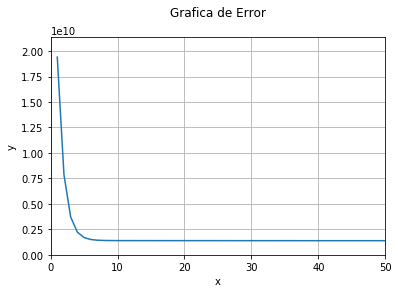

Modelo generado: y(x)=45411.9988x - 96469.5713


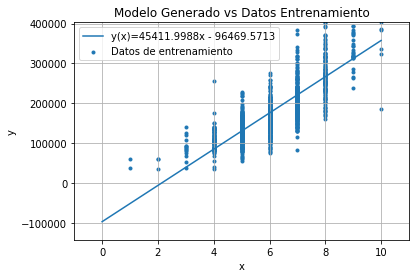

In [1006]:
# variable 1, OverallQual
dictMB = {}
v1_mb = 0
index = 1
x = tr80[:, index]
y = tr80[:, 0]
epochNum = 100000
printEach = 10000
truncX = 50   # para truncar ejeX, si epochs es muy grande no se distingue el error en grafica
lrnRate = 0.01

# Entrenar modelo 
dictErr, dictMB = entrenar(x, y, epochNum, printEach, lrnRate)

# Graficar Error
graficarError(dictErr, dictMB, epochNum, truncX)

# Graficar el modelo generado
graficarModelo(dictMB, 10, 2, modelo, index)
v1_mb = dictMB.get(len(dictMB)) # almaceno el modelo final para utilizarlo en funcion sklearn

# Entrenamiento y gráficas para Variable 2 (1stFlrSF)

In [ ]:
# variable 2, 1stFlrSF
index = 2
dictMB={}
x = tr80[:, index]
y = tr80[:, 0]
epochNum = 10000000
printEach = 1000000
truncX = 50   # para truncar ejeX, si epochs es muy grande no se distingue el error en grafica
lrnRate = 0.00000129
#lrnRate =  0.0000005

# Entrenar modelo y graficar error
dictErr, dictMB = entrenar(x, y, epochNum, printEach, lrnRate)

# Graficar Error
graficarError(dictErr, dictMB, epochNum, truncX)

# Graficar el modelo generado
graficarModelo(dictMB, 4000, 100, modelo, index)

v2_mb = dictMB.get(len(dictMB)) # almaceno el modelo final para utilizarlo en funcion sklearn

Epoch: 1 ; Err= 19183319979.304794 ; m= 1 ; b= 1


# Entrenamiento de modelo utilizando SciKit Learn
En esta sección se creará un modelo para cada una de las variables, utilizando scikit learn.  Además una función para comparar el modelo manual vs el modelo sklearn, devolviendo un vector para cada uno, y un tercer vector con el promedio de los primeros 2.

In [935]:
# funcion para comparar modelo manual y sklearn

def compararModelos(modeloManual, modeloSk, x, y):
    x2 = np.ones((x.size,2))
    x2[:,0] = x
    y_manual = x2.dot(modeloManual)
    y_sk = x2.dot(modeloSk)
    y_comb = (y_manual + y_sk)/2
    return(y_manual, y_sk, y_comb)


### Variable 1

In [1016]:
# Para Variable #1 - OverallQual

# Generar Modelo con scikit learn
x_training1 = tr80[:,1]
y_training1 = tr80[:,0]
x2_1 = x_training1.reshape(x_training1.size,1)
reg1 = linear_model.LinearRegression()
reg1.fit(x2_1, y_training1)
sk1_mb = np.array([reg.coef_[0], reg.intercept_])

# utilizar datos de prueba para comparar los modelos
x_testing1 = te20[:,1]
y_testing1 = te20[:,0]

# comparar modelos enviando modelo manual, modelo sk
y_manual1, y_sk1, y_comb1 = compararModelos(v1_mb, sk1_mb, x_testing1, y_testing1)

# Calculate Error for each model, 0.5 * np.mean(np.power(y-y_hat,2))
err_manual1 = np.mean(np.power(y_manual1 - y_testing1,2))
err_sk1 = np.mean(np.power(y_sk1 - y_testing1,2))
err_comb1 = np.mean(np.power(y_comb1 - y_testing1,2))

print("Error de cada modelo para", header[1])
print(" > Manual:\t", err_manual1)
print(" > Sk Learn:\t", err_sk1)
print(" > Promedio:\t", err_comb1)

Error de cada modelo para OverallQual
 > Manual:	 2627259819.681006
 > Sk Learn:	 2627259819.681007
 > Promedio:	 2627259819.681006


### Variable 2

In [1033]:
# Para Variable #2 - 1stFlrSF

# Generar Modelo con scikit learn
sk2_mb=np.array([0,0])
x_training2 = tr80[:,2]
y_training2 = tr80[:,0]
x2_2 = x_training2.reshape(x_training2.size,1)
reg2 = linear_model.LinearRegression()
reg2.fit(x2_2, y_training2)
sk2_mb = np.array([reg2.coef_[0], reg2.intercept_])

# utilizar datos de prueba para comparar los modelos
x_testing2 = te20[:,2]
y_testing2 = te20[:,0]

# comparar modelos enviando modelo manual, modelo sk
y_manual2, y_sk2, y_comb2 = compararModelos(v2_mb, sk2_mb, x_testing, y_testing)

# Calculate Error for each model, 0.5 * np.mean(np.power(y-y_hat,2))
err_manual2 = np.mean(np.power(y_manual2 - y_testing2,2))
err_sk2 = np.mean(np.power(y_sk2 - y_testing2,2))
err_comb2 = np.mean(np.power(y_comb2 - y_testing2,2))

print("Error de cada modelo para", header[2])
print(" > Manual:\t", err_manual2)
print(" > Sk Learn:\t", err_sk2)
print(" > Promedio:\t", err_comb2)

Error de cada modelo para 1stFlrSF
 > Manual:	 39446349834.558136
 > Sk Learn:	 29480546377.931683
 > Promedio:	 34237900173.72886


# Error para cada modelo

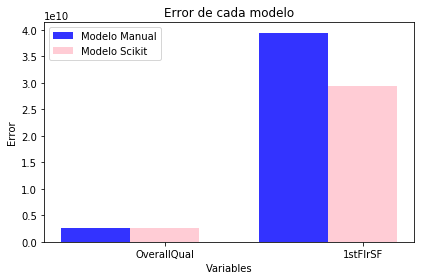

In [1041]:
# Grafica de Barras para mostrar el error de los modelos
n_groups = 2
modelo_manual = (err_manual1, err_manual2)
modelo_sk = (err_sk1, err_sk2)
 
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, modelo_manual, bar_width,
alpha=opacity,
color='blue',
label='Modelo Manual')
 
rects2 = plt.bar(index + bar_width, modelo_sk, bar_width,
alpha=opacity,
color='pink',
label='Modelo Scikit')
 
plt.xlabel('Variables')
plt.ylabel('Error')
plt.title('Error de cada modelo')
plt.xticks(index + bar_width, (header[1], header[2]))
plt.legend()
 
plt.tight_layout()
plt.show()